In [1]:
import pandas as pd

In [3]:
import kagglehub

path = kagglehub.dataset_download("antonioskokiantonis/newscsv")

100%|██████████| 11.5M/11.5M [00:02<00:00, 5.51MB/s]


Extracting files...


In [7]:
import os

print(os.listdir(path))

['news.csv']


In [8]:
csv_path = os.path.join(path, "news.csv")
df = pd.read_csv(csv_path)

In [9]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [12]:
df.shape

(6335, 4)

In [13]:
col = df["label"].value_counts()

In [14]:
col

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

<Axes: xlabel='label'>

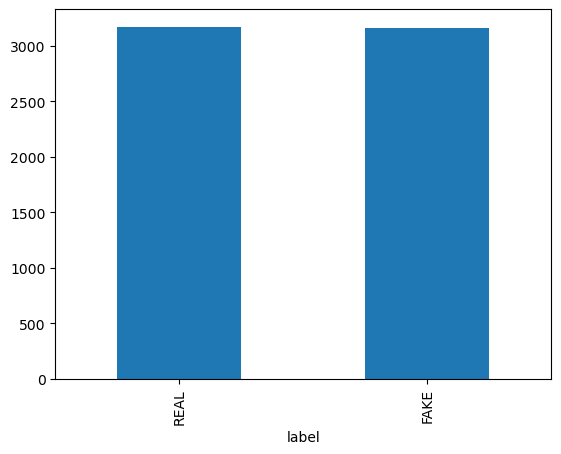

In [15]:
import matplotlib.pyplot as plt
col.plot(kind = 'bar')

In [16]:
x = df.iloc[:,2].values
y = df.iloc[:,3].values

In [18]:
x

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [19]:
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [21]:
x_train.shape

(4751,)

In [22]:
x_test.shape

(1584,)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english")
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [73]:
import joblib
joblib.dump(vect, 'vect.pkl')

['vect.pkl']

In [25]:
from sklearn.svm import SVC
model = SVC()

In [26]:
model.fit(x_train_vect, y_train)

SVC()

In [27]:
y_pred = model.predict(x_test_vect)

In [28]:
y_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [29]:
y_pred[0:5]

array(['REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [30]:
y_test[0:5]

array(['REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8642676767676768

In [32]:
#lets use naive bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [34]:
model.fit(x_train_vect, y_train)

MultinomialNB()

In [35]:
y_pred = model.predict(x_test_vect)

In [36]:
y_pred[0:5]

array(['REAL', 'REAL', 'FAKE', 'REAL', 'REAL'], dtype='<U4')

In [38]:
y_test[0:5]

array(['REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8819444444444444

In [53]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [54]:
text_model = joblib.load('model.pkl')

In [55]:
text = "The world is gonna end on 20 feb 2025"

text1 = vect.transform([text])

In [56]:
prediction = text_model.predict(text1)

In [57]:
prediction

array(['REAL'], dtype='<U4')

In [58]:
pip install streamlit

In [74]:
%%writefile app.py
import streamlit as st
import joblib
from sklearn.feature_extraction.text import CountVectorizer

vect = joblib.load("vect.pkl")

st.title("Real fake news classifier")
text_model = joblib.load("model.pkl")

input = st.text_input("Enter your news")
output = text_model.predict(vect.transform([input]))
if st.button("Predict"):
    st.title(output[0])

Overwriting app.py


In [75]:
!streamlit run app.py

^C
